<a href="https://colab.research.google.com/github/Esau-May/MachineLearningCourse/blob/main/Activities/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ds.csv', index_col=0, sep=',', encoding='latin-1')

data


,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339


In [ ]:
#Contar datos nulos
total_datos_nulos = data.isnull().sum().sum()

print(f"Total de datos nulos en el DataFrame: {total_datos_nulos}")

Total de datos nulos en el DataFrame: 305


In [ ]:
#Categorico a binario
df = pd.get_dummies(data, columns=['gdo_rezsoc00','gdo_rezsoc05', 'gdo_rezsoc10'])
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,gdo_rezsoc05_Alto,gdo_rezsoc05_Bajo,gdo_rezsoc05_Medio,gdo_rezsoc05_Muy alto,gdo_rezsoc05_Muy bajo,gdo_rezsoc10_Alto,gdo_rezsoc10_Bajo,gdo_rezsoc10_Medio,gdo_rezsoc10_Muy alto,gdo_rezsoc10_Muy bajo
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,0,1,0,0,0,0,1,0,0,0
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,0,0,0,0,1,0,0,0,0,1
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#Rellenar datos nulos
df = df.fillna(data.mean())

<ipython-input-21-8365da8d83e4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(data.mean())


In [ ]:
#Volver a contar los datos nulos
total_datos_nulos = df.isnull().sum().sum()

print(f"Total de datos nulos en el DataFrame: {total_datos_nulos}")

Total de datos nulos en el DataFrame: 0


<ipython-input-29-65a649d24e41>:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corrwith(df[feature])


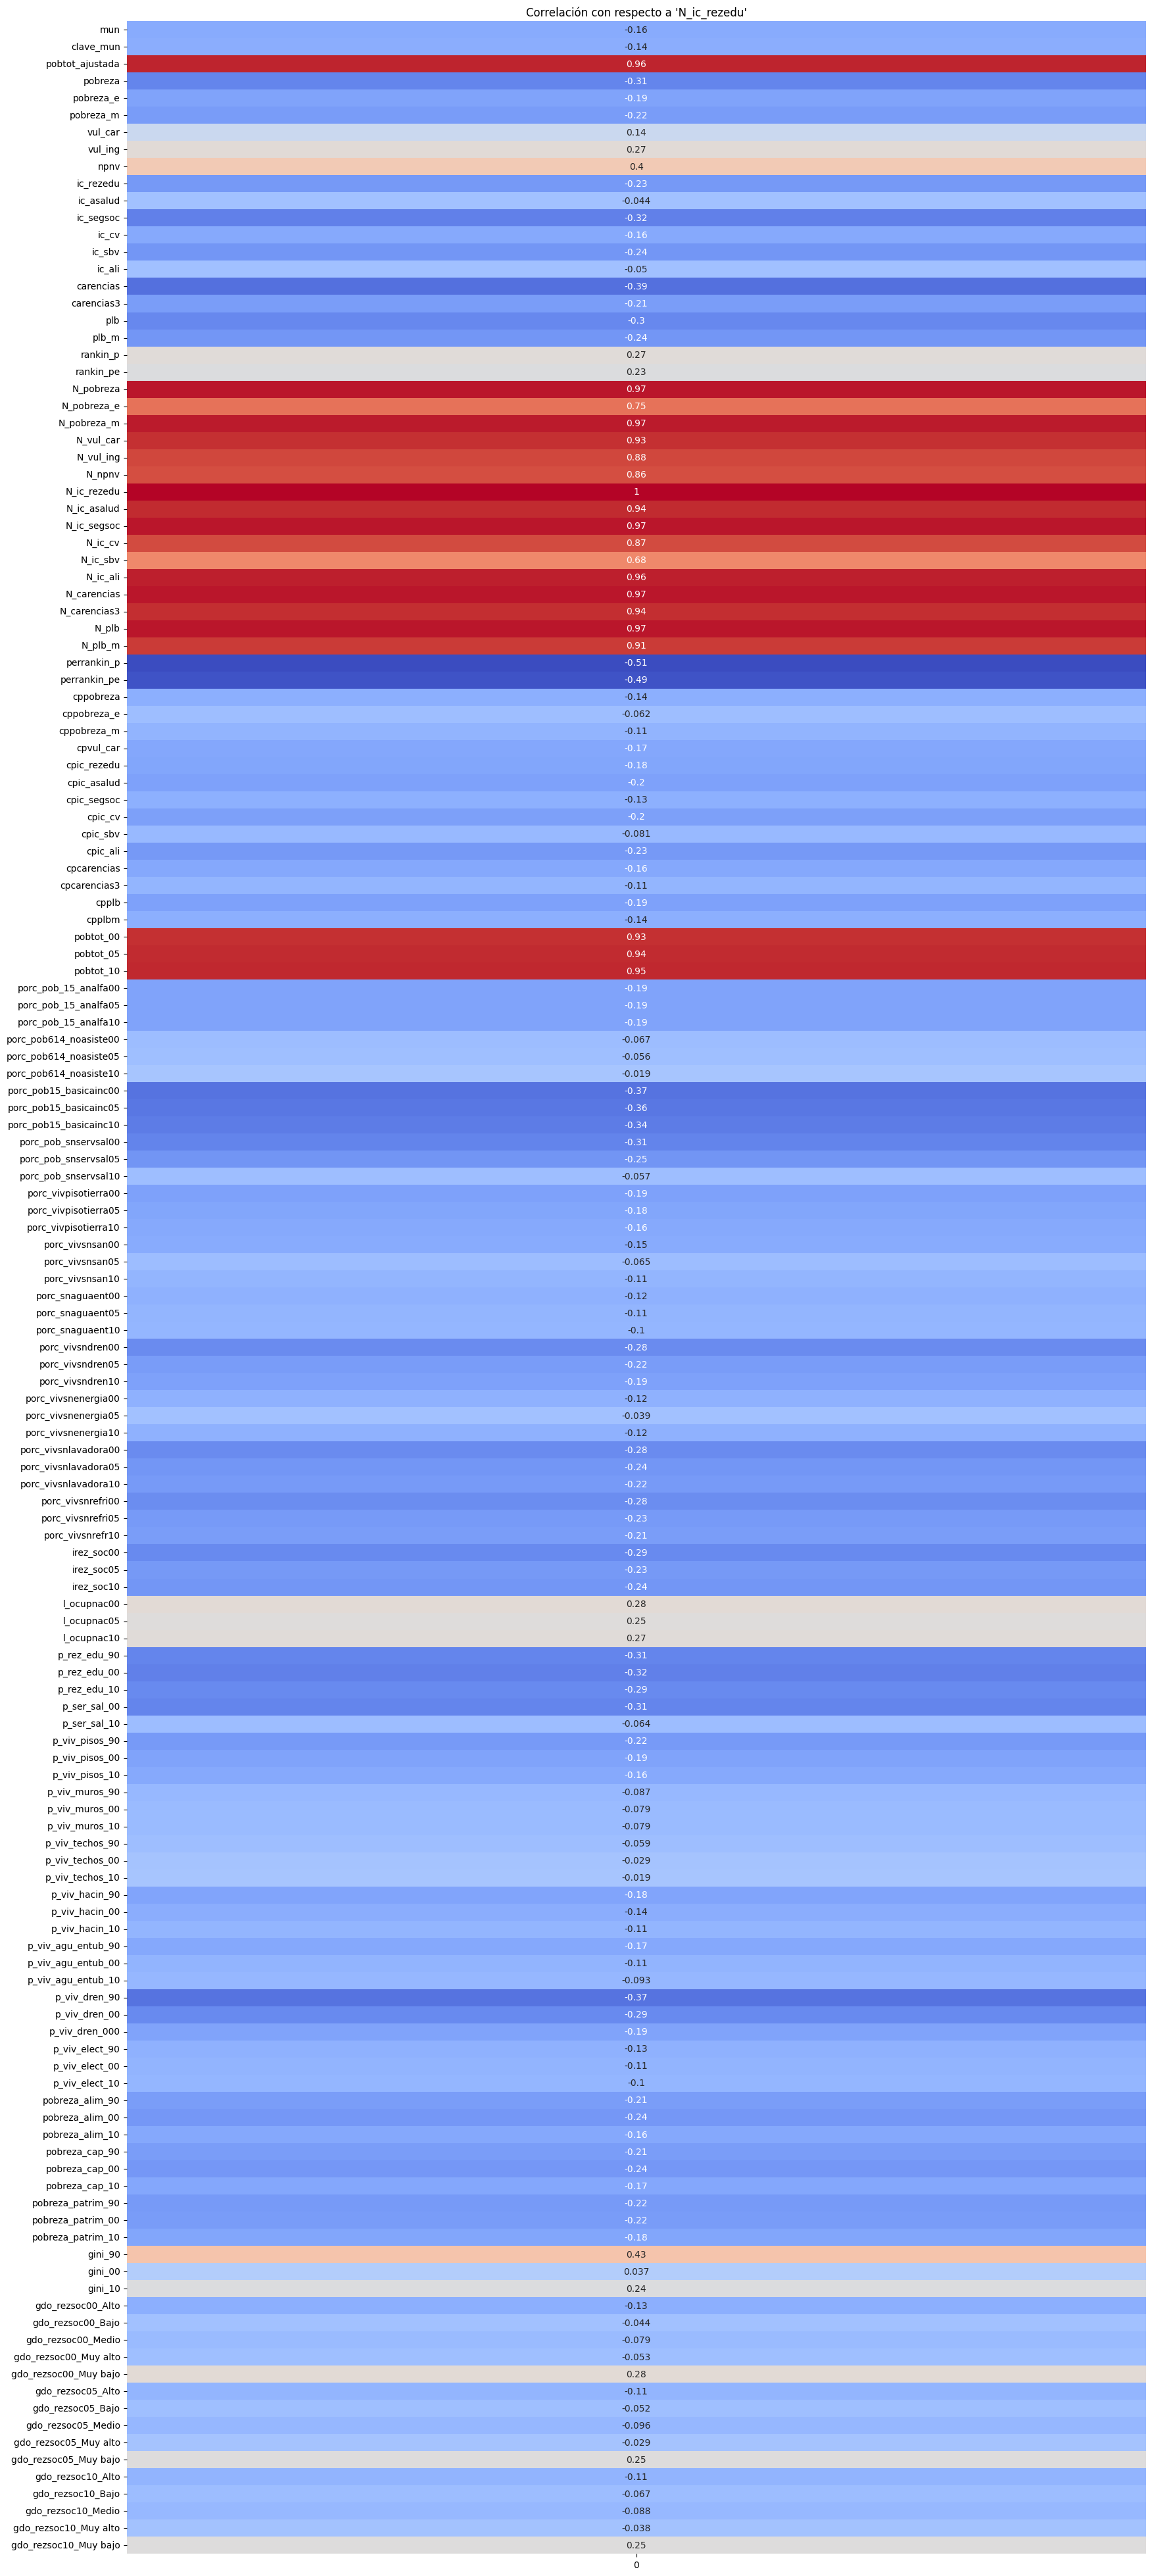

In [ ]:
#Matriz de correlacion
feature = 'N_ic_rezedu'

# Calculo
correlation_matrix = df.corrwith(df[feature])

# Crear el mapa de calor
plt.figure(figsize=(20, 50))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title(f"Correlación con respecto a '{feature}'")
plt.show()

Coeficiente de predicción (R cuadrado): 0.9670740869877422


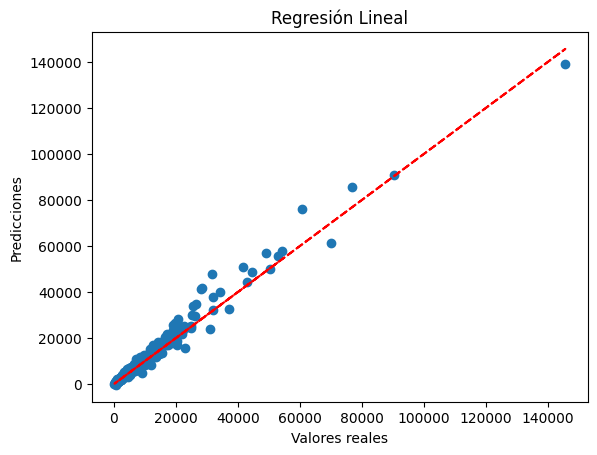

In [ ]:
features = ['pobtot_ajustada', 'N_pobreza', 'N_pobreza_e', 'N_pobreza_m', 'N_vul_car', 'N_vul_ing', 'N_npnv', 'N_ic_asalud', 'N_ic_segsoc', 'N_ic_cv', 'N_ic_sbv', 'N_ic_ali', 'N_carencias', 'N_carencias3', 'N_plb', 'N_plb_m', 'pobtot_00', 'pobtot_05', 'pobtot_10']
target = 'N_ic_rezedu'

# División de los datos para entrenamiento (80%) y prueba (20%) respectivamente
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Implementación del algoritmo
def linear_regression(X, y):
    X = np.insert(X, 0, 1, axis=1)
    X_transpose = np.transpose(X)
    XTX = X_transpose.dot(X)
    XTY = X_transpose.dot(y)
    coefficients = np.linalg.solve(XTX, XTY)
    return coefficients

# Preparacion de datos para entrenamiento
X_train = train_data[features].to_numpy()
y_train = train_data[target].to_numpy()
X_test = test_data[features].to_numpy()
y_test = test_data[target].to_numpy()

# Entrenamiento del modelo
coefficients = linear_regression(X_train, y_train)

# Predicción
X_test = np.insert(X_test, 0, 1, axis=1)
y_pred = X_test.dot(coefficients)

# Cálculo del coeficiente de predicción (R cuadrado)
y_mean = np.mean(y_test)
sst = np.sum((y_test - y_mean) ** 2)
sse = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (sse / sst)

# Impresión del coeficiente de predicción
print(f'Coeficiente de predicción (R cuadrado): {r_squared}')

# Gráfico de la regresión lineal
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal")
plt.show()

Coeficiente de Determinación (R^2): 0.982579203369604


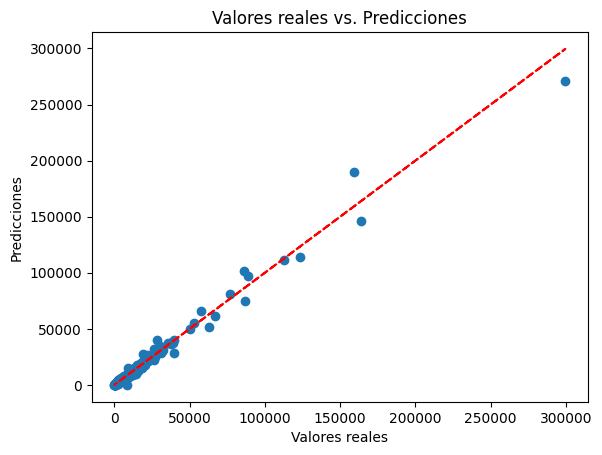

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['pobtot_ajustada', 'N_pobreza', 'N_pobreza_e', 'N_pobreza_m', 'N_vul_car', 'N_vul_ing', 'N_npnv', 'N_ic_asalud', 'N_ic_segsoc', 'N_ic_cv', 'N_ic_sbv', 'N_ic_ali', 'N_carencias', 'N_carencias3', 'N_plb', 'N_plb_m', 'pobtot_00', 'pobtot_05', 'pobtot_10']]  # Variables independientes
y = df['N_ic_rezedu']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

r2 = r2_score(y_test, y_pred)

# Imprimir el valor de R^2
print(f"Coeficiente de Determinación (R^2): {r2}")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar resultados
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()